# Visualizing the Trajectory Data of Taxi Cabs in Porto, Portugal

Data source : https://www.kaggle.com/datasets/crailtap/taxi-trajectory/data

### Part 1: Loading the data

The dataset provided is a route tracker for 442 taxis running in the city of Porto, Portugal over the course of about a year.  The goal of this notebook is to take the location data tracked in the POLYLINE section and plot it on a 2D plane for visualization purposes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Does anyone ever read these auto-gen comments?
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import json 
from shapely.geometry import LineString, Point

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Alternatively, try asking asking the input handler nicely and it might let you play with it

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/portomap/PortoMap.png
/kaggle/input/taxi-trajectory/train.csv
/kaggle/input/enumclaw-to-richland/track_points.csv


Let's start by taking a look at how big the table that we're working with is.

In [2]:
len(pd.read_csv("/kaggle/input/taxi-trajectory/train.csv"))

1710670

1.7 million lines of data is quite big for our initial data visualization purposes, so lets scale it back by ... a lot, lets say down to 1000 lines so these operations can be quick.

In [3]:
# Time to fill the dataframe
df = pd.read_csv("/kaggle/input/taxi-trajectory/train.csv", nrows = 1000)
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


### Part 2: Cleaning the Data

The polyline column of the data is a series of recordings of the taxi's latitude and longitude, taken in 15 second intervals.  In order to plot the polyline data, it needs to be registered as a series of lines between these geographical "points"

NOTE: This section was done with reference to Michael Ganger's Kaggle notebook where they point out invalid routes on GPS trips, and drop the routes with junk data.  That will be done through the course of this notebook too, with an example provided to explain why I am doing so, but the original work for the process can be found here:
https://www.kaggle.com/code/mrganger/identifying-invalid-gps-points-in-taxi-trips

In [4]:
df['traj'] = json.loads('[' + df.POLYLINE.str.cat(sep=',') + ']')
df = df[df.traj.str.len()>1].copy()
df['lines'] = gpd.GeoSeries(df.traj.apply(LineString))
df = gpd.GeoDataFrame(df, geometry = 'lines')
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj,lines
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[-8.618643, 41.141412], [-8.618499, 41.141376...","LINESTRING (-8.61864 41.14141, -8.61850 41.141..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[-8.639847, 41.159826], [-8.640351, 41.159871...","LINESTRING (-8.63985 41.15983, -8.64035 41.159..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...","[[-8.612964, 41.140359], [-8.613378, 41.14035]...","LINESTRING (-8.61296 41.14036, -8.61338 41.140..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...","[[-8.574678, 41.151951], [-8.574705, 41.151942...","LINESTRING (-8.57468 41.15195, -8.57470 41.151..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","LINESTRING (-8.64599 41.18049, -8.64595 41.180..."


Now the dataframe is a GeoDataFrame, with a LineString data column named "lines" that contains the data needed to plot the trajectories to a grid.

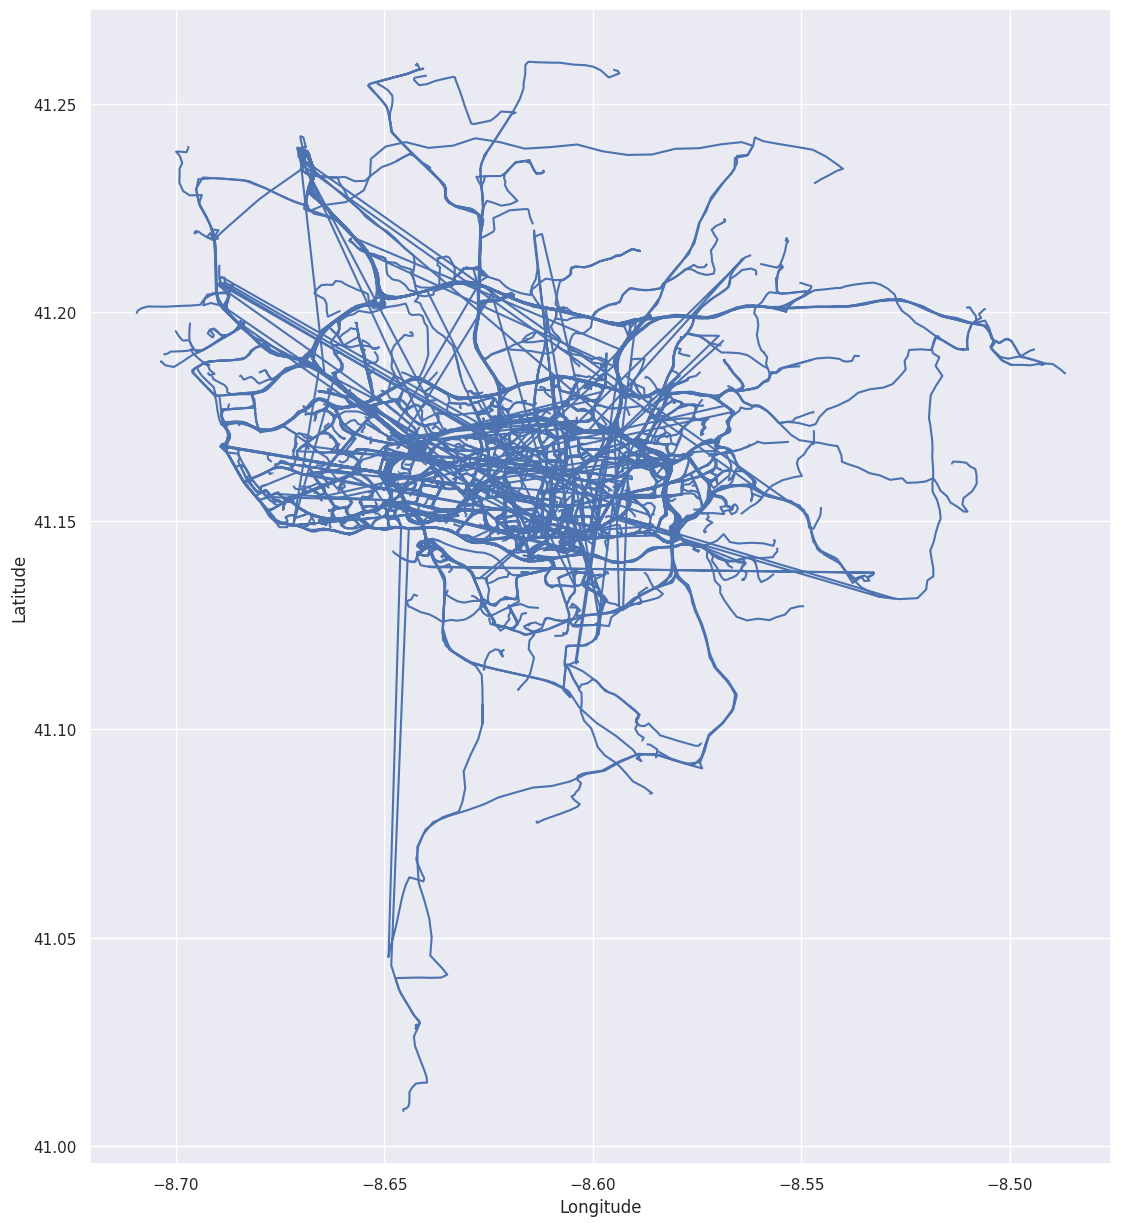

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,8]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df.lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

It's sort of what we are looking for, there is a clear outline of routes and main thoroughfares, but there's clearly routes that have buggy data, where they suddenly go straight in one direction for miles and return before continuing.

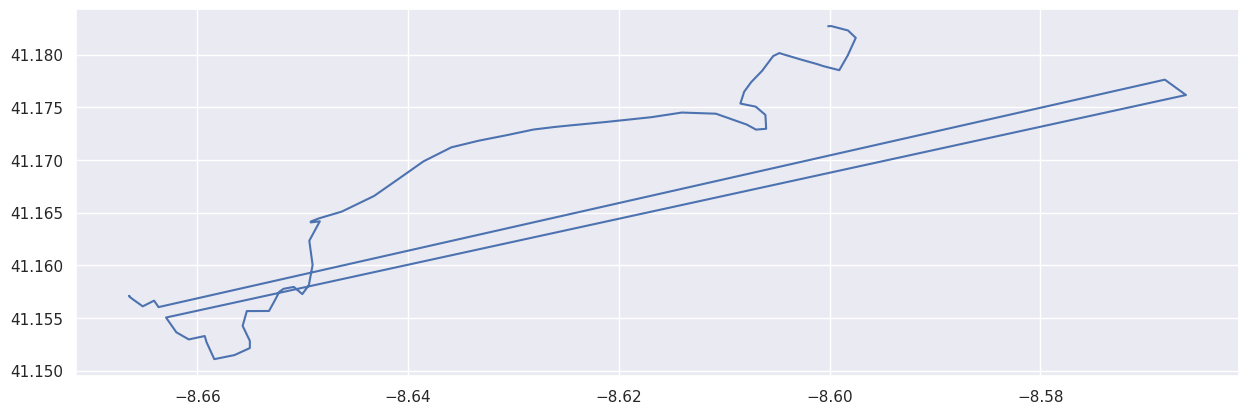

In [6]:
df.iloc[[730]].lines.plot(figsize=[15,15]);

It is unlikely that the taxi went so far out of its way and back in 15 seconds without breaking either a legal or physical law, or at the very least making the passenger carsick, so the data with long stretches of straight travel like the one shown above will be removed from the visualization using the method created by Michael Ganger (credit found at top of section)

In [7]:
from sklearn.metrics import DistanceMetric
metric = DistanceMetric.get_metric('haversine')
dt = 15/3600 # 15 second intervals over the course of 1 hour (3600 seconds)
R = 6371 # 6371 is the radius of the earth in kilometers

def fit_rational(x,y,w=1):
    ws = np.sqrt(w)
    (a,b),_,_,_ = np.linalg.lstsq(np.column_stack([x,-y])*ws[:,None], x*y*ws, rcond=None)
    return a*x/(x+b), (a,b)

def dist_sequence(coords):
    n = len(coords)
    dist = R*metric.pairwise(np.radians(coords)).ravel() 
    offsets = (np.arange(n)[:,None] - np.arange(n)).ravel()
    return pd.DataFrame([offsets[offsets>0]*dt*60,dist[offsets>0]], index=['time_offset', 'distance']).T

dist_ungrouped = pd.concat(df.traj.apply(dist_sequence).values).set_index('time_offset')
dists = np.sqrt((dist_ungrouped**2).groupby('time_offset').mean()/2)
thresh = -2
dists['curve'], coeffs = fit_rational(dists.index.values, dists.distance.values, ((1+np.arange(len(dists)))/(1+len(dists)))**-3)

def likelihood(coords, ab):
    n = len(coords)
    a,b = coeffs
    dist = R*metric.pairwise(np.radians(coords))
    time = dt*60*np.abs(np.arange(n)[:,None] - np.arange(n))
    sigma = a*time/(time + b) + np.eye(n)
    lr = -0.5*(dist**2/sigma**2).sum(axis=1)
    return lr

def norm_lr(lr):
    return (lr-lr.max())/len(lr)


bad_routes = df.traj.apply(lambda t: (norm_lr(likelihood(t,coeffs)) < thresh).any()).values
print(bad_routes.sum())

116


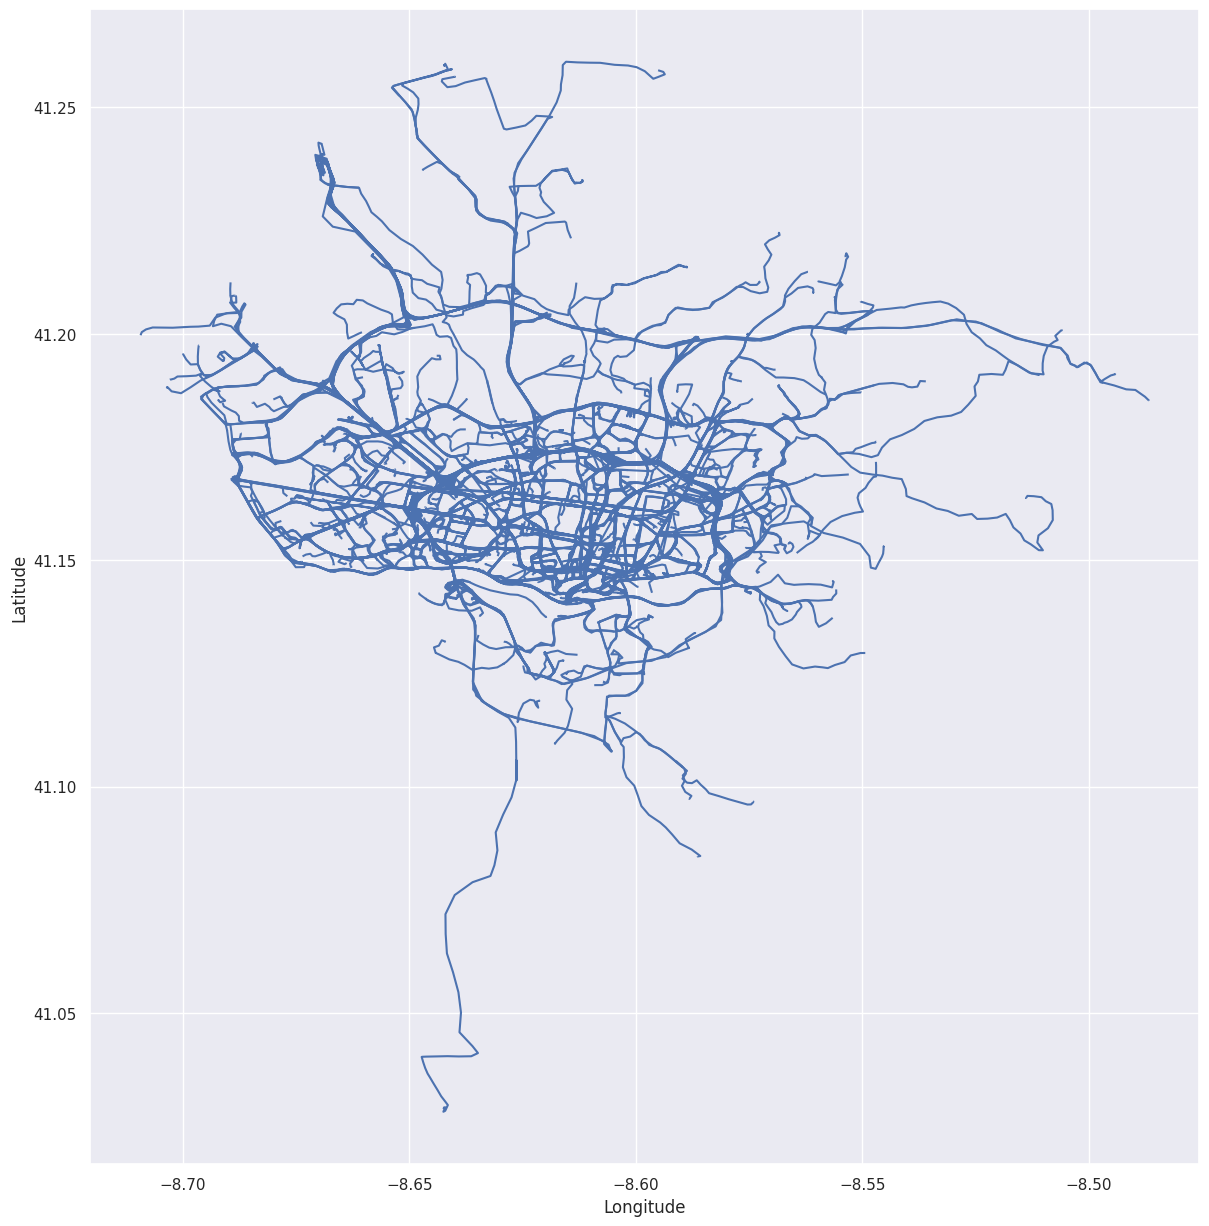

In [8]:
df[~bad_routes].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [9]:
# Lets make a new dataframe thats just the clean data
cleandf = df[~bad_routes]
cleandf.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj,lines
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[-8.618643, 41.141412], [-8.618499, 41.141376...","LINESTRING (-8.61864 41.14141, -8.61850 41.141..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[-8.639847, 41.159826], [-8.640351, 41.159871...","LINESTRING (-8.63985 41.15983, -8.64035 41.159..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","LINESTRING (-8.64599 41.18049, -8.64595 41.180..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[...","[[-8.615502, 41.140674], [-8.614854, 41.140926...","LINESTRING (-8.61550 41.14067, -8.61485 41.140..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-...","[[-8.57952, 41.145948], [-8.580942, 41.145039]...","LINESTRING (-8.57952 41.14595, -8.58094 41.145..."


# Part 2: Identifying Driver Patterns from datastream of coordinates

In our proposed application, the data will be coming in as it is collected, in this scenario with the taxis the location was reported every 15 seconds, so that will be used to calculate the speed of the driver.  In this iteration of the application, it will simply stop once it has identified a driver profile, but in real use this algorithm would continue to run as the driver drives.

The first step will be to separate an array from its entry, to feed piecemeal into the algorithm

In [10]:
type(cleandf.iloc[[2]].traj)
trajectories = cleandf.traj
trajectories.head()

0    [[-8.618643, 41.141412], [-8.618499, 41.141376...
1    [[-8.639847, 41.159826], [-8.640351, 41.159871...
4    [[-8.645994, 41.18049], [-8.645949, 41.180517]...
5    [[-8.615502, 41.140674], [-8.614854, 41.140926...
6    [[-8.57952, 41.145948], [-8.580942, 41.145039]...
Name: traj, dtype: object

The algorithm will run each time a new set of coordinates is collected, to calculate the speed that the vehicle is going at we must use the Haversine formula, which lets us calculate the distance between two points.  To determine the direction of the vehicle, we assume the earth is a spheroid in calculations, which is incorrect but will be uniformly incorrect for each of the bearings calculated, which works for our purposes of comparing them directly.  The function for finding distance is called distance(), the one for finding direction is called getBearing(), and the function for our algorithm is called profiler().  The profiler function calls a series of helper functions named "check______ " that it uses to check for specific driver profiles, and if one of them returns true, it assigns the driver profile for the driver function (defined later) to notify the user about.

In [11]:
import math

#deprecated functions, turns out trying to calculate speed and direction using the radius of the planet for conversion isn't so great
from math import radians, cos, sin, asin, sqrt

routeList = []
speedList = [] # values of speedList are in miles per hour
directionList = [] # values of directionList are in degrees off North, with 90 for North, 0 for East, 270 for South, and 180 for West

driverProfile = "normal" # drivers are normal until proven otherwise
def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    #dlon = radians(dlon)
    #dlat = radians(dlat)
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a)) 
    
    # We are trying to find speed in mph, so the radius of earth we use is 3956 miles
    radius = 3956
      
    # calculate the result
    return(c * radius)

def getBearing(lat1, lat2, lon1, lon2):
    #lon1 = radians(lon1)
    #lon2 = radians(lon2)
    #lat1 = radians(lat1)
    #lat2 = radians(lat2)
    dLon = lon2 - lon1;
    dLat = lat2 - lat1;
    brng = math.atan2(dLat, dLon)/math.pi*180
    #y = math.sin(dLon) * math.cos(lat2);
    #x = math.cos(lat1)*math.sin(lat2) - math.sin(lat1)*math.cos(lat2)*math.cos(dLon);
    #brng = np.rad2deg(math.atan2(y, x));
    if brng < 0: 
        brng+= 360
    compass_brackets = ["N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"]
    compass_lookup = round(brng/45)
    return compass_brackets[compass_lookup]#round(brng,2)

def resetLists():
    routeList.clear()
    speedList.clear()
    directionList.clear()
    
def profiler(longitude, latitude):
    # Step 1: add new coordinates to list
    routeList.append([longitude,latitude])
    # Step 2: add new speed and direction to the list
    # NOTE: if there is only one element in the routeList the speed and direction of the vehicle cannot be determined, so they are not entered
    if(len(routeList)>2):
        speedList.append(round(distance(routeList[-2][1], latitude, routeList[-2][0], longitude)/dt, 2)) # Reminder that dt is 15/3600 aka 15 seconds written as hours
        directionList.append(getBearing(routeList[-2][1], latitude, routeList[-2][0], longitude))
        
    # Step 3: Determine if this new information points us to a new driver profile
    #    NOTE: It is unlikely that any driver profile can be found within the first minute or so, 
    #          as the person has only just started driving, and the algorithm does not have much to work with.
    #          It is because of this that the program only starts looking for driver profile after 4 cycles, to allow averages to start mattering
    if(len(routeList)<5):
        return "normal"
    if(checkLookingForParking()):
        return "looking for parking"
    if(checkLost()):
        return "lost"
    if(checkDistracted()):
        return "distracted"
    return "normal"
    
def checkLookingForParking():
    # Check for if driver is looking for parking
    # Someone looking for parking will drive slowly, max 15 mph so they can scan for open parking
    # They will also switch direction as they look for a spot (at least once)
    # This behavior has to continue for 4 cycles (1 minute) until the algorithm marks it as "Looking for parking"
    if(speedList[-1] < 15):
        parkingSpeed = True
        sameDirection = True # preload a boolean variable as a flag to ensure the vehicle has changed directions since starting to drive slowly
        for x in range(1, 4): # check the last 3 cycles before this one to see if the driver is still driving slow
            if(speedList[-x] > 15):
                parkingSpeed = False
            if(directionList[-x] != directionList[-1]): # if the current direction matches with the previous directions then the driver has not turned since starting to drive slow, and is likely in traffic (not parking)
                sameDirection = False
        if(parkingSpeed and not sameDirection): #if the slow speed has been maintained and the vehicle has changed directions, then the driver profile "looking for parking" is assigned
            return True
    return False

def checkLost(): # NOTE: currently not built yet!
    return False

def checkDistracted(): # NOTE: currently not built yet!
    return False

Since the algorithm runs in realtime, activating whenever new data is collected and fed to it, there will need to be a driver function that simulates this while we work with static data.  We shall call this the simDriving function.

In [12]:
checkedRoute = 1 #NOTE route 64 is interesting so far, and 75 for why change in direction cannot be only signifier for lost, 41 might be distracted
def simDriving(routeNumber):  #route number is so the algorithm knows which route it is analyzing
    resetLists()
    driverProfile = "normal" # Driver profile defaults to normal until proven otherwise
    # In a real use-case scenario, the algorithm runs while the data is being collected
    #  so this function will call the algorithm once per each coordinate in the series
    for trajectory in trajectories.iloc[routeNumber]:
        driverProfile = profiler(trajectory[1],trajectory[0])
        if (driverProfile != "normal"): # if the driver profile is anything not normal, the algorithm stops and notifies the user
            break
    print("This driver has the parking profile of " + driverProfile)
    
simDriving(checkedRoute)
print("\n\n The below are NOT outputs:")
print(routeList)
print(speedList)
print(directionList)

This driver has the parking profile of normal


 The below are NOT outputs:
[[41.159826, -8.639847], [41.159871, -8.640351], [41.160114, -8.642196], [41.160492, -8.644455], [41.160951, -8.646921], [41.161491, -8.649999], [41.162031, -8.653167], [41.16258, -8.656434], [41.163192, -8.660178], [41.163687, -8.663112], [41.1642, -8.666235], [41.164704, -8.669169], [41.165136, -8.670852], [41.166576, -8.670942], [41.167962, -8.66961], [41.168988, -8.668098], [41.170005, -8.66664], [41.170635, -8.665767], [41.170671, -8.66574]]
[30.83, 37.94, 41.55, 51.77, 53.24, 54.88, 62.85, 49.29, 52.43, 49.31, 28.77, 23.64, 31.67, 30.17, 29.35, 17.77, 0.74]
['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'NE', 'NE', 'NE', 'NE', 'NE']


Our team has also found a way to record our own GPS coordinates as we drive along a route using a GPS logger app.  It records in intervals of 1-3 seconds as chosen by the user, and since we have built our algorithm to run for datapoints in intervals of 15 seconds, we need to concatenate the data to match the algorithm before it can be used as input.

In [20]:
customdf = pd.read_csv("/kaggle/input/enumclaw-to-richland/track_points.csv")
customdf.head()
#need to remove rows so that it shows every 15 seconds instead of every 3
#NOTE: IF THE SAMPLING WAS SET TO TAKE A COORDINATE EVERY SECOND USE customdf = customdf.iloc[::15]
customdf = customdf.iloc[::5]
customdf.head(10)


,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,course,speed,magvar,...,urlname,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,-121.791704,47.487067,0,0,0,115.884,2023/11/22 22:17:19+00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN
5,-121.791704,47.487067,0,0,5,115.911,2023/11/22 22:18:13+00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN
10,-121.791831,47.487003,0,0,10,119.259,2023/11/22 22:18:28+00,NaN,3.36,NaN,...,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
15,-121.792657,47.487009,0,0,15,116.788,2023/11/22 22:18:43+00,NaN,8.53,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
20,-121.793634,47.488374,0,0,20,114.043,2023/11/22 22:18:58+00,NaN,11.09,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
25,-121.794123,47.488934,0,0,25,113.222,2023/11/22 22:19:13+00,NaN,0.34,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
30,-121.794121,47.488929,0,0,30,114.578,2023/11/22 22:19:28+00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
35,-121.794469,47.489210,0,0,35,116.531,2023/11/22 22:19:43+00,NaN,5.52,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
40,-121.796293,47.488522,0,0,40,116.677,2023/11/22 22:19:58+00,NaN,15.60,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
45,-121.797054,47.487785,0,0,45,115.365,2023/11/22 22:20:13+00,NaN,11.12,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN


Since the longitude and latitude are stored so it is one coordinate every row on our custom collected dataframe, we will need to adjust our driver function slightly.

In [19]:
def simCustomDriving():
    resetLists()
    driverProfile = "normal" # Driver profile defaults to normal until proven otherwise
    # In a real use-case scenario, the algorithm runs while the data is being collected
    #  so this function will call the algorithm once per each coordinate in the series
    for index, row in customdf.iterrows():
        driverProfile = profiler(row[0],row[1])
        if (driverProfile != "normal"): # if the driver profile is anything not normal, the algorithm stops and notifies the user
            break
    print("This driver has the parking profile of " + driverProfile)
simCustomDriving()

-121.79170413
-121.79170359
-121.79183121
-121.79265743
-121.79363403
-121.79412327
-121.79412087
-121.79446861
This driver has the parking profile of looking for parking


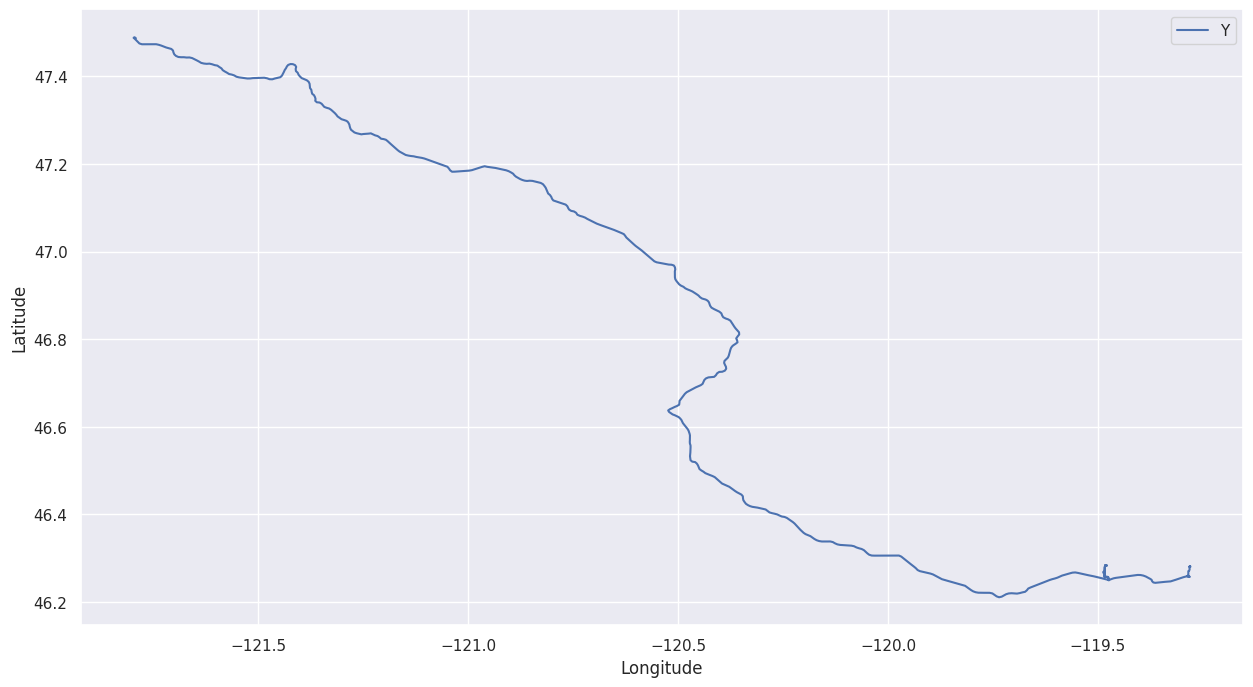

In [23]:
customdf.plot(x = 'X', y = 'Y')
plt.xlabel('Longitude')
plt.ylabel('Latitude');